# Scenario

The Telcom company wants to understand how likely customers are going to churn 

In [1]:
# Import the data and necessary packages

import pandas as pd
import numpy as np
import scipy as scp
import sklearn
from sklearn import metrics
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# Import the data
data = pd.read_csv(r'C:\Users\patri\Desktop\LSE_CareerAccelerator\Course 3\Week 2\Data\customer_data.csv')

# Check the dataset
data.info()

C:\Users\patri\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

In [2]:
# We need to remove the periods in the EDU column. We will create two lists and run a for loop to replace the values

# Create two lists: one with initial and one with new values.
intial_vals = ['illiterate', 'unknown', 'basic', 'high', 'university', 'professional']
new_vals = ['other', 'other', 'pre-school', 'high-school', 'uni', 'masters']

# Create a for loop to replace the values.
for old_val, new_val in zip(intial_vals, new_vals):
    data.loc[data['Edu'].str.contains(old_val),'Edu' ] = new_val

# Display all the unique values/check changes.
data['Edu'].unique()  

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [3]:
# Name the new DataFrame as cat_vars and specify the column names that we want to transform into dummy variables.
cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month', 'DOW', 'Last_out']

# Use the for loop keyword to specify what actions to apply to all the items 
for var in cat_vars:
    # The category list = 'var' + '_' + 'var'
    # Specify the details of the categorical list
    cat_list = pd.get_dummies(data[var], prefix = var)
    # Indicate the joining of the DataFrames
    data = data.join(cat_list)

df_fin = data.drop(cat_vars, axis = 1)

# Specify the column names:
cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month', 'DOW', 'Last_out']

# Set a temporary DataFrame and add values
df_vars = data.columns.values.tolist()

# Indicate what columns are kept
to_keep = [i for i in df_vars if i not in cat_vars]

# Define a new DataFrame
df_fin = data[to_keep]

# Print the colum
df_fin.columns.values

df_fin.describe()

,Age,Duration,Campaign,PosDays,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target,...,Month_oct,Month_sep,DOW_fri,DOW_mon,DOW_thu,DOW_tue,DOW_wed,Last_out_failure,Last_out_nonexistent,Last_out_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,...,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,259.279249,2.770014,186.910907,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,...,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       41188 non-null  int64  
 1   Duration                  41188 non-null  int64  
 2   Campaign                  41188 non-null  int64  
 3   PosDays                   41188 non-null  int64  
 4   Var_rate                  41188 non-null  float64
 5   Price_idx                 41188 non-null  float64
 6   Conf_idx                  41188 non-null  float64
 7   Month_rate                41188 non-null  float64
 8   Quarterly_emp             41188 non-null  float64
 9   Target                    41188 non-null  int64  
 10  Occupation_admin.         41188 non-null  uint8  
 11  Occupation_blue-collar    41188 non-null  uint8  
 12  Occupation_entrepreneur   41188 non-null  uint8  
 13  Occupation_housemaid      41188 non-null  uint8  
 14  Occupa

### Balancing the data

Although the random forest is not a regression model, we still need to balance the dataset. 

In [8]:
# Create a DataFrame to used and replace missing values with zero
df_fin = df_fin.fillna(0)

# Select the nessecary columns:
# Always keep in mind we need a qualitative rationale for including or excluding a column.
# Why would a independent variable could be a predicting quality for the classification we try to predict?
nec_cols = ['Status_divorced', 'Status_married', 'Status_single', 'Status_unknown',
            'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school', 'Edu_uni',
            'House_no', 'House_unknown', 'House_yes',
            'Loan_no', 'Loan_unknown', 'Loan_yes',
            'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed']

# Set the independent variables
X = df_fin[nec_cols]

# Set the dependent variable
y = df_fin['Target']

# Create a new DataFrame and apply the SMOTE technique as target is not balanced
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Specify the column values
columns = X_train.columns
# Specify the new data sets
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# Print the DataFrame
print('length of oversampled data is ', len(os_data_X))

os_data_y

length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


## Build and fit the random forest model

After going through the initial steps of data cleansing and balancing we can now use the data we have worked on to create the random forest algorithm. 

In [10]:
# Import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create a forest object based on the 'RandomForestClassifier'
# We can also define the hyperparameters, this allows us to customize the behavior of the ML algorithm. 
forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini',
                                min_samples_split = 2, min_samples_leaf = 2,
                                max_features = 'auto', bootstrap = True, n_jobs = -1,
                                random_state = 42)

# Train and predict the model
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# Print the accuracy, how often is our classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88864611151574


## Visualize the model

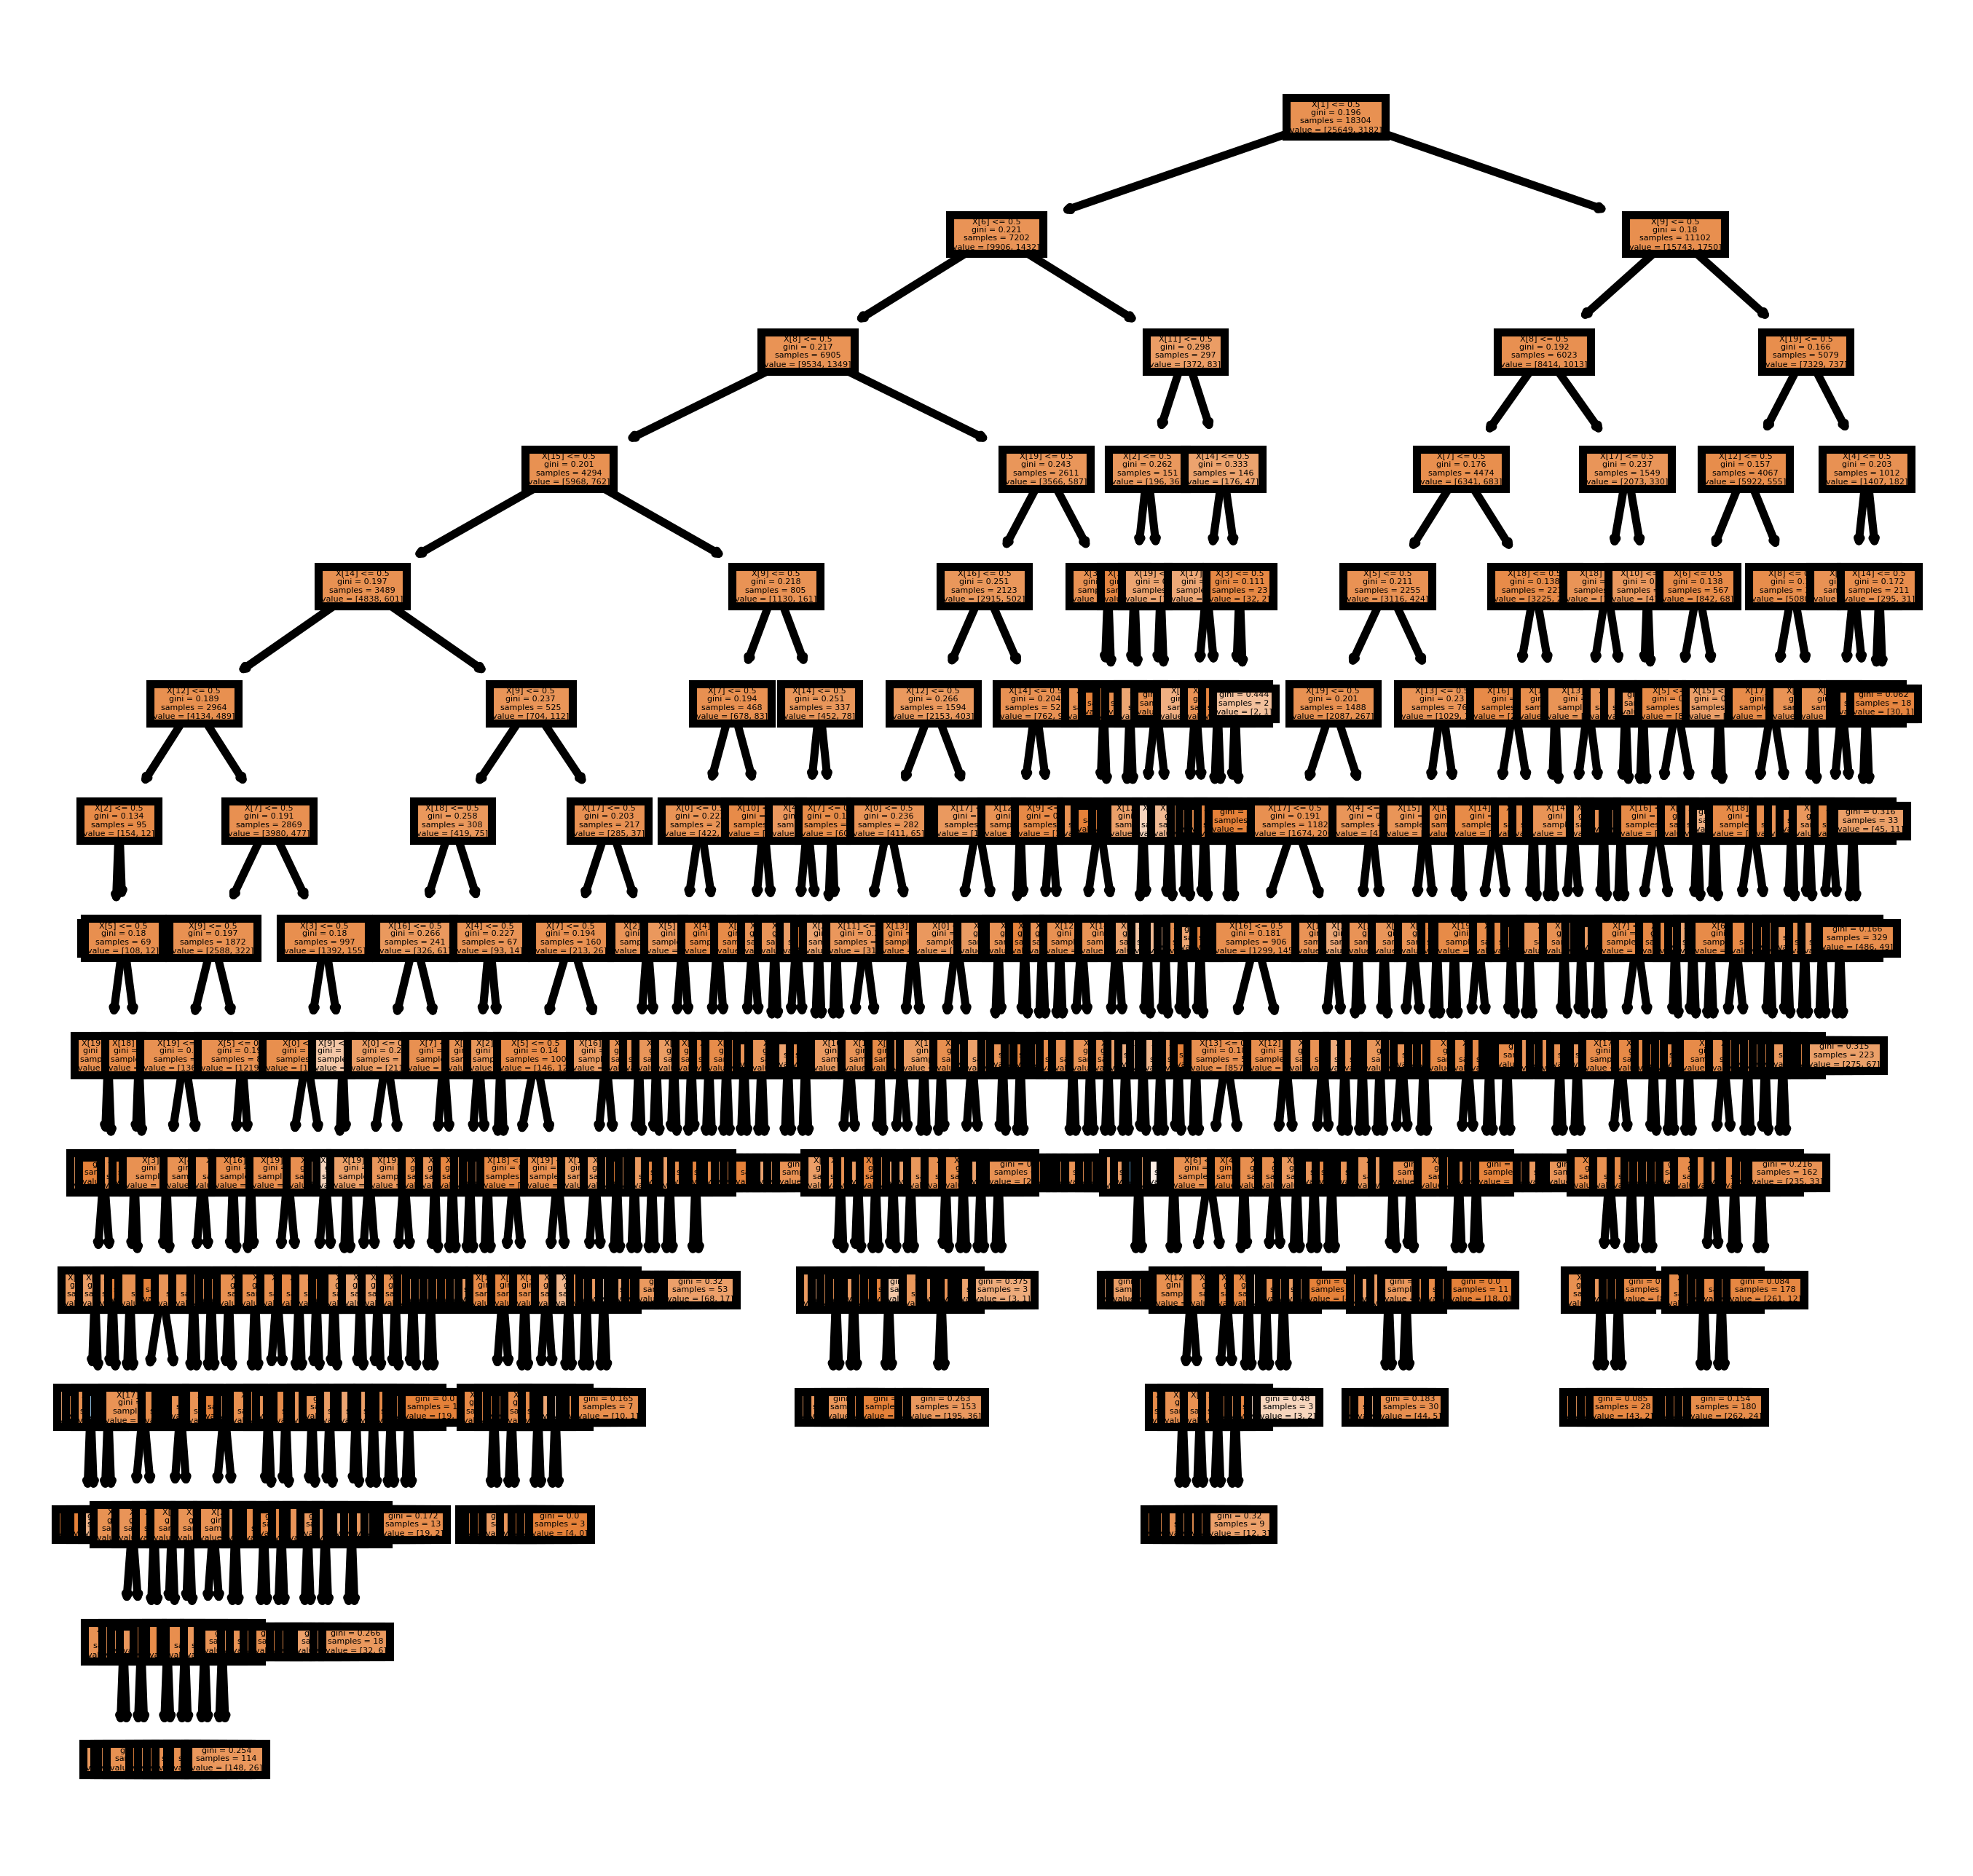

In [11]:
# Import the libraries
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

# Plot the decision tree to create the visualization
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 800)
tree.plot_tree(forest.estimators_[0], filled = True);
fig.savefig('randomforest.png')